In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
# Load Dataset
data = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')


In [5]:
# Data Overview
print("Dataset Shape:", data.shape)
print(data.info())

Dataset Shape: (250000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB
Non

In [6]:
# Data Cleaning
# Drop duplicates
data.drop_duplicates(inplace=True)

In [15]:
# Convert Date Column
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

In [18]:
# Handling Missing Values
data = data.dropna(subset=['Customer ID'])

In [20]:
print(data.columns)


Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')


In [21]:
# Exploratory Data Analysis (EDA)
print("Top 5 Selling Product Categories:")
print(data['Product Category'].value_counts().head(5))

Top 5 Selling Product Categories:
Product Category
Clothing       75052
Books          74912
Electronics    50185
Home           49851
Name: count, dtype: int64


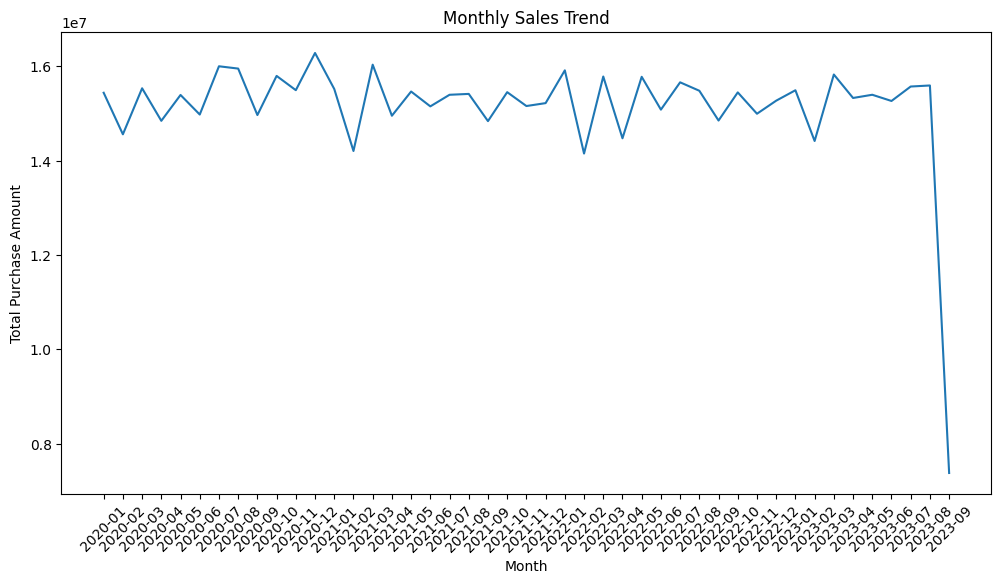

In [22]:
# Monthly Sales Trend
data['Month'] = data['Purchase Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total Purchase Amount'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

In [23]:
# RFM Segmentation
snapshot_date = data['Purchase Date'].max() + pd.Timedelta(days=1)
rfm = data.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (snapshot_date - x.max()).days,
    'Customer ID': 'count',
    'Total Purchase Amount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

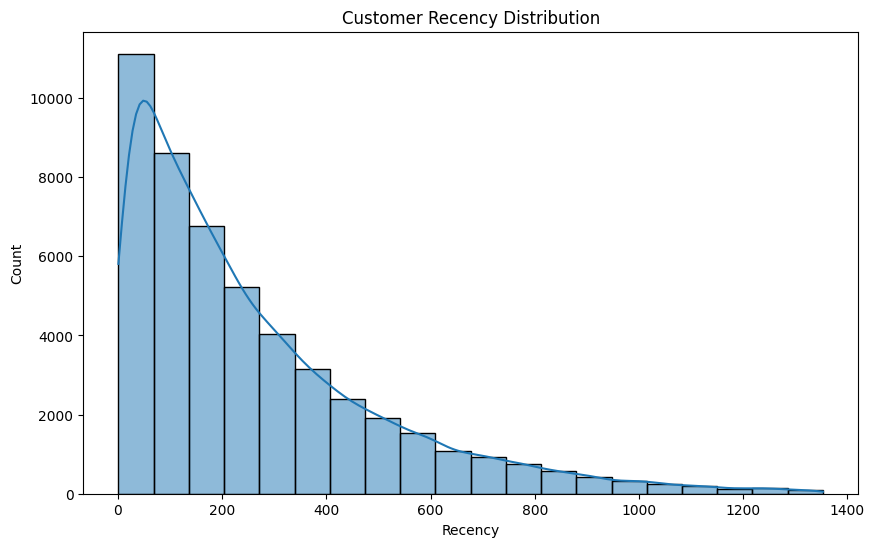

In [24]:
# Visualization of Customer Segments
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], bins=20, kde=True)
plt.title('Customer Recency Distribution')
plt.show()

In [26]:
# Save Processed Dataset
rfm.to_csv('ecommerce_rfm_segmentation.csv', index=True)
print("Project Complete! Processed data saved as ecommerce_rfm_segmentation.csv")


Project Complete! Processed data saved as ecommerce_rfm_segmentation.csv
